In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from videpy import Vide

import networkx as nx
# from causalgraphicalmodels import CausalGraphicalModel

import stan
import nest_asyncio

plt.style.use('default')

plt.rcParams['axes.facecolor'] = 'lightgray'

# To DAG's
import daft
from causalgraphicalmodels import CausalGraphicalModel

In [3]:
# To running the stan in jupyter notebook
nest_asyncio.apply()

### R Code 7.1 - Pag 194

In [8]:
sppnames = ('afarensis', 'africanus', 'habilis',  'boisei', 'rudolfensis', 'ergaster', 'sapiens')
brainvolcc = (438, 452, 612, 521,  752, 871, 1350)
masskg = (37.0, 35.5, 34.5, 41.5, 55.5, 61.0, 53.5)

d = pd.DataFrame({'species':sppnames, 'brain': brainvolcc, 'mass':masskg})
d

,species,brain,mass
0,afarensis,438,37.0
1,africanus,452,35.5
2,habilis,612,34.5
3,boisei,521,41.5
4,rudolfensis,752,55.5
5,ergaster,871,61.0
6,sapiens,1350,53.5


In [24]:
 d.mass[i]

37.0

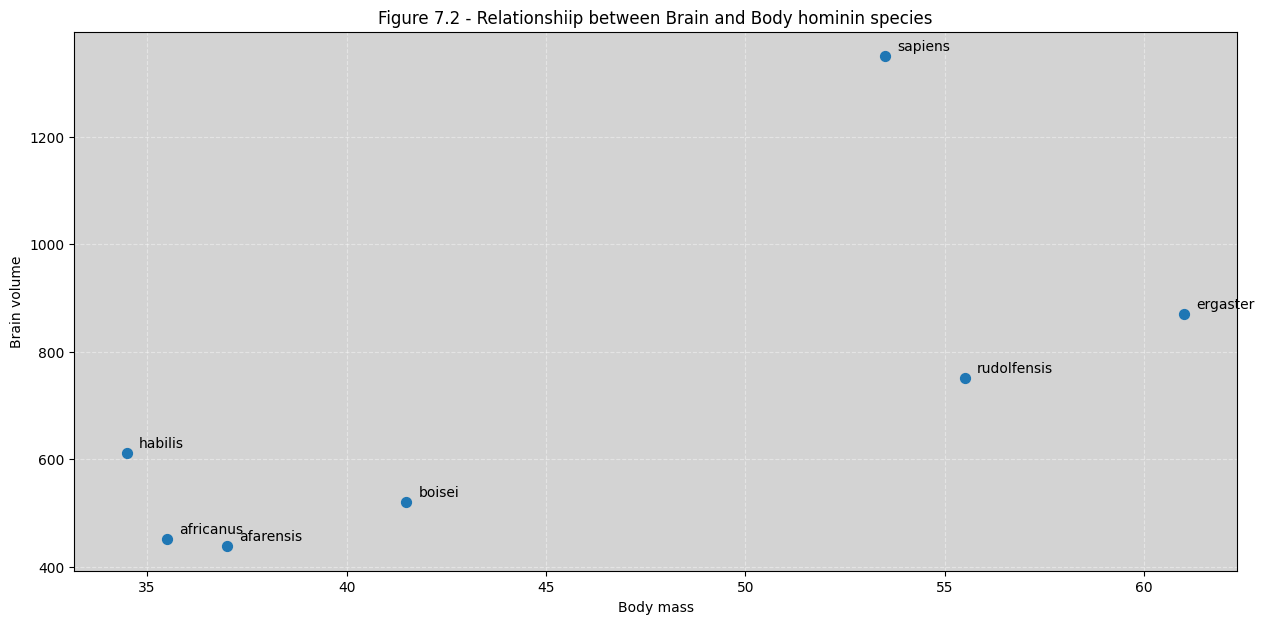

In [49]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(d.mass, d.brain, marker='o', s=50)

for i, text in enumerate(sppnames):
    ax.annotate(text, (d.mass[i]+0.3, d.brain[i]+10))
    
ax.set_title('Figure 7.2 - Relationshiip between Brain and Body hominin species')
ax.set_xlabel('Body mass')
ax.set_ylabel('Brain volume')

ax.grid(ls='--', color='white', alpha=0.4)
plt.show()

### R Code 7.2 - pag 196

In [55]:
d['mass_std'] = (d.mass - np.mean(d.mass))/np.std(d.mass)
d['brain_std'] = d.brain / np.std(d.brain)
d

,species,brain,mass,mass_std,brain_std
0,afarensis,438,37.0,-0.841920,1.468107
1,africanus,452,35.5,-0.990494,1.515033
2,habilis,612,34.5,-1.089544,2.051328
3,boisei,521,41.5,-0.396198,1.746310
4,rudolfensis,752,55.5,0.990494,2.520585
5,ergaster,871,61.0,1.535266,2.919455
6,sapiens,1350,53.5,0.792396,4.524987


$$ b_i \sim Normal(\mu_i, \sigma) $$

$$ \mu_i = \alpha + \beta m_i $$

$$ \alpha \sim Normal(0.5, 1) $$

$$ \beta \sim Normal(0, 10) $$

$$ \sigma \sim LogNormal(0, 1) $$